In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import tqdm
import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#from utils.path_utils import project_root

data_path = './training/'

training_examples = []
training_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
training_size = len(training_files)
training_files.sort()

In [2]:
x = []
demo = []
y = []
name = []
all_x = [[] for i in range(40)]
mean_x = []
std_x = []
min_x = []
max_x = []
med_x = []
rec_cnt = []  #patient record length
feature_name = []

# Calc basic stats
for fn in training_files:
    name.append(int(fn[1:].split('.')[0]))
    fn = data_path + fn
    cur_cnt = 0
    with open(fn, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            cur_cnt += 1
            if row[0] == "HR":
                feature_name = row
                continue
            for i in range(len(row)-1): # Except label y
                if row[i] != '':
                    all_x[i].append(float(row[i]))
    rec_cnt.append(cur_cnt - 1)
    
rec_cnt = np.array(rec_cnt)
tot_rec_cnt = np.sum(rec_cnt)


In [3]:
print(tot_rec_cnt)

1552210


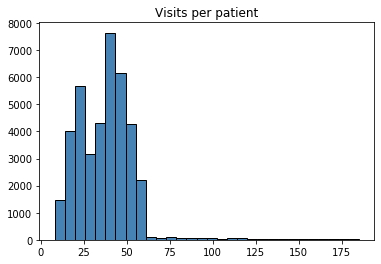

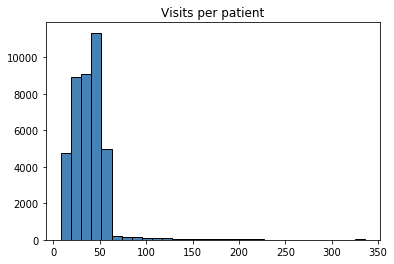

In [4]:
threshold = int(np.size(rec_cnt) * 0.005)
cur = np.sort(rec_cnt)
cur = cur[threshold: -threshold]
pdf = PdfPages('./data/stat figures/chal_rec_len_part.pdf')
plt.hist(cur, bins=30, color='steelblue', edgecolor='black')
plt.title('Visits per patient')
pdf.savefig()
plt.show()
pdf.close()

pdf = PdfPages('./data/stat figures/chal_rec_len_full.pdf')
plt.hist(rec_cnt, bins=30, color='steelblue', edgecolor='black')
plt.title('Visits per patient')
pdf.savefig()
plt.show()
pdf.close()

In [3]:
index = [27, 29, 18, 16, 26, 33, 28, 31, 32, 15, 11, 25, 21, 20, 9, 17, 30, 19]
for i in range(40):
    cur = np.array(all_x[i])
    mean_x.append(np.mean(cur))
    std_x.append(np.std(cur))
    min_x.append(np.min(cur))
    max_x.append(np.max(cur))
    med_x.append(np.median(cur))
#     if i in index:
#         pdf = PdfPages('./data/stat figures/chal_' +feature_name[i] +'_full.pdf')
#         plt.hist(cur, bins=30, color='steelblue', edgecolor='black')
#         plt.title(feature_name[i])
#         pdf.savefig()
#         plt.show()
#         pdf.close()
    
stat = {'mean': mean_x, 'std': std_x, 'min': min_x, 'max': max_x, 'median': med_x}

# stat_fn_1 = 'challenge_full_stat.csv'
# stat_f1 = open(stat_fn_1, 'w', encoding='utf-8')
# writer1 = csv.writer(stat_f1)
# writer1.writerow(['feature_name', 'cnt', 'mean', 'std', 'max', 'min', 'median', 'missing_rate'])

for id in index:
    print(feature_name[id])
    print('cnt: %d mean: %.4f std: %.4f max: %.4f min: %.4f median: %.4f miss_rate: %.4f' \
          % (len(all_x[id]), mean_x[id], std_x[id], max_x[id], min_x[id], med_x[id], 1-len(all_x[id])/tot_rec_cnt))
#     writer1.writerow([feature_name[id], str(len(all_x[id])), str(mean_x[id]), \
#                       str(std_x[id]), str(max_x[id]), str(min_x[id]), str(med_x[id]), str(1-len(all_x[id])/tot_rec_cnt)])
    
# for id in range(40):
#     if id not in index:
#         writer1.writerow([feature_name[id], str(len(all_x[id])), str(mean_x[id]), \
#                       str(std_x[id]), str(max_x[id]), str(min_x[id]), str(med_x[id]), str(1-len(all_x[id])/tot_rec_cnt)])

# writer1.writerow(['patient record', str(np.size(rec_cnt)), str(np.mean(rec_cnt)), str(np.std(rec_cnt)), \
#                   str(np.max(rec_cnt)), str(np.min(rec_cnt)), str(np.median(rec_cnt)), '0'])
# stat_f1.close()


TroponinI
cnt: 14781 mean: 8.2901 std: 24.8054 max: 440.0000 min: 0.0100 median: 0.3000 miss_rate: 0.9905
Hgb
cnt: 114591 mean: 10.4308 std: 1.9687 max: 32.0000 min: 2.2000 median: 10.3000 miss_rate: 0.9262
Chloride
cnt: 70466 mean: 105.8279 std: 5.8804 max: 145.0000 min: 26.0000 median: 106.0000 miss_rate: 0.9546
Alkalinephos
cnt: 24941 mean: 102.4837 std: 120.1203 max: 3833.0000 min: 7.0000 median: 74.0000 miss_rate: 0.9839
Bilirubin_total
cnt: 23141 mean: 2.1141 std: 4.3114 max: 49.6000 min: 0.1000 median: 0.9000 miss_rate: 0.9851
Platelets
cnt: 92209 mean: 196.0139 std: 103.6348 max: 2322.0000 min: 1.0000 median: 181.0000 miss_rate: 0.9406
Hct
cnt: 137433 mean: 30.7941 std: 5.4917 max: 71.7000 min: 5.5000 median: 30.3000 miss_rate: 0.9115
WBC
cnt: 99447 mean: 11.4464 std: 7.7310 max: 440.0000 min: 0.1000 median: 10.3000 miss_rate: 0.9359
Fibrinogen
cnt: 10242 mean: 287.3857 std: 152.9954 max: 1760.0000 min: 34.0000 median: 250.0000 miss_rate: 0.9934
BUN
cnt: 106568 mean: 23.9155 st

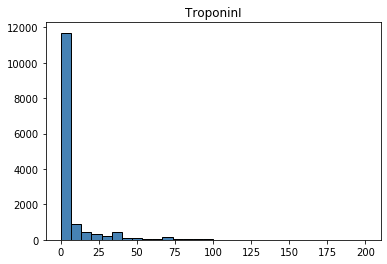

TroponinI
cnt: 14635 mean: 7.2548 std: 19.2134 max: 200.0000 min: 0.0100 median: 0.3000


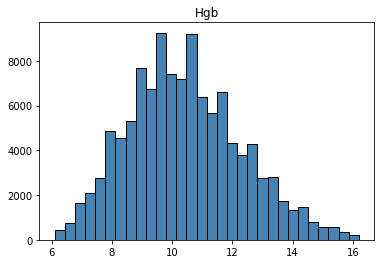

Hgb
cnt: 113447 mean: 10.4203 std: 1.8747 max: 16.2000 min: 6.1000 median: 10.3000


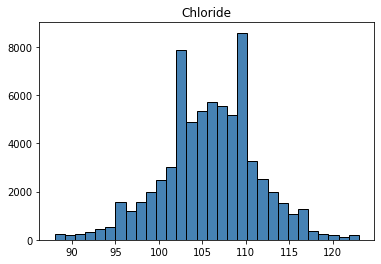

Chloride
cnt: 69762 mean: 105.8267 std: 5.4485 max: 123.0000 min: 88.0000 median: 106.0000


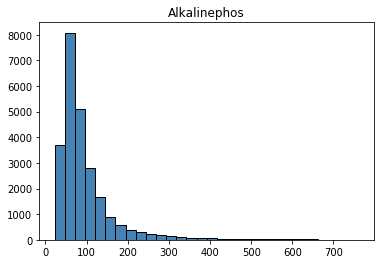

Alkalinephos
cnt: 24693 mean: 97.2970 std: 80.2259 max: 762.0000 min: 22.0000 median: 74.0000


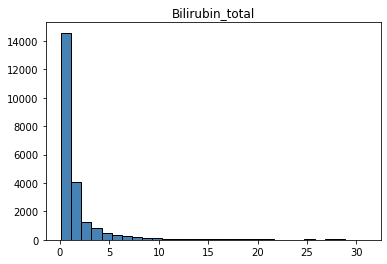

Bilirubin_total
cnt: 22911 mean: 1.9457 std: 3.5040 max: 30.9000 min: 0.1000 median: 0.9000


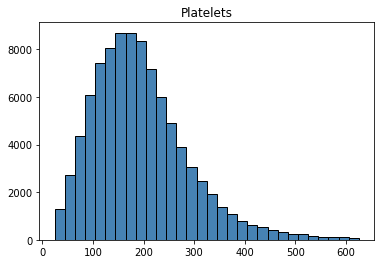

Platelets
cnt: 91287 mean: 194.0384 std: 94.2699 max: 626.0000 min: 24.0000 median: 181.0000


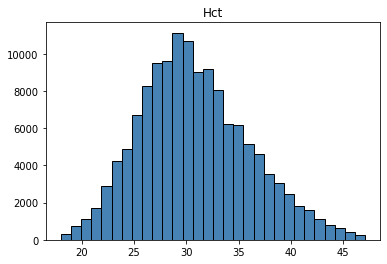

Hct
cnt: 136059 mean: 30.7679 std: 5.2382 max: 47.1000 min: 18.0000 median: 30.3000


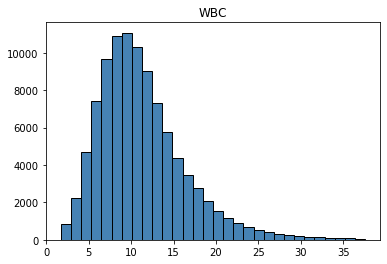

WBC
cnt: 98453 mean: 11.2007 std: 5.1278 max: 37.6000 min: 1.7000 median: 10.3000


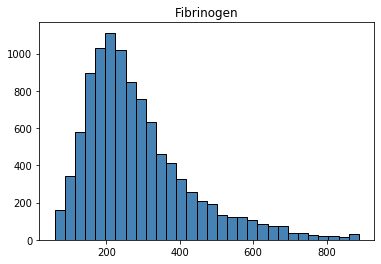

Fibrinogen
cnt: 10140 mean: 284.9921 std: 143.6898 max: 888.0000 min: 59.0000 median: 250.0000


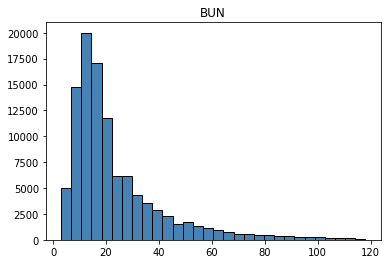

BUN
cnt: 105504 mean: 23.4497 std: 18.2512 max: 118.0000 min: 3.0000 median: 17.0000


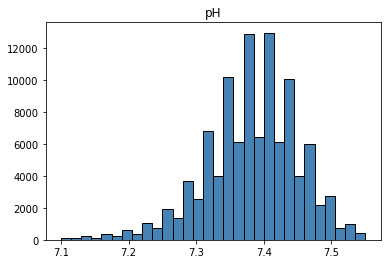

pH
cnt: 106499 mean: 7.3797 std: 0.0687 max: 7.5500 min: 7.1000 median: 7.3800


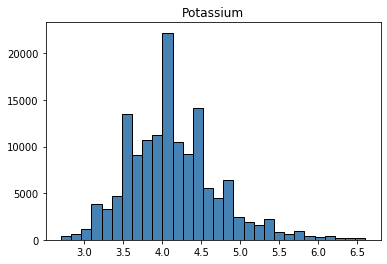

Potassium
cnt: 143081 mean: 4.1266 std: 0.5794 max: 6.6000 min: 2.7000 median: 4.1000


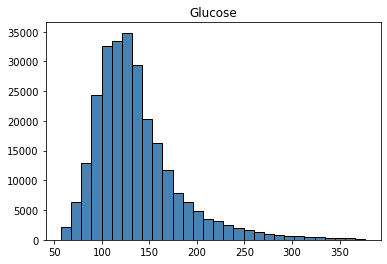

Glucose
cnt: 262862 mean: 135.7096 std: 44.8164 max: 377.0000 min: 57.0000 median: 127.0000


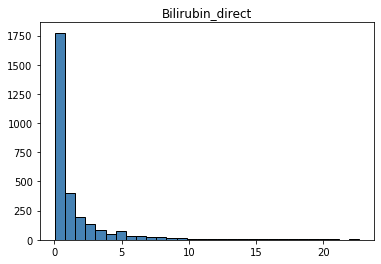

Bilirubin_direct
cnt: 2962 mean: 1.7213 std: 3.2298 max: 22.6800 min: 0.0300 median: 0.4450


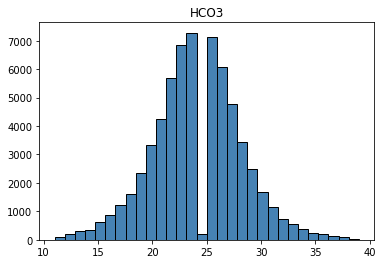

HCO3
cnt: 64378 mean: 24.0632 std: 4.0643 max: 39.0000 min: 11.0000 median: 24.0000


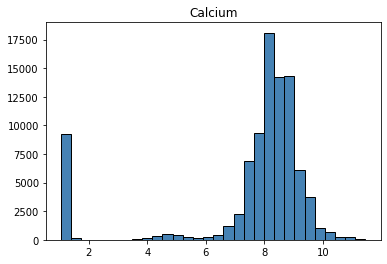

Calcium
cnt: 90419 mean: 7.5521 std: 2.3296 max: 11.4500 min: 1.0500 median: 8.3000


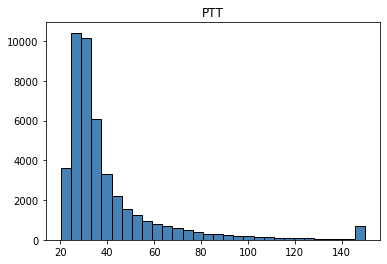

PTT
cnt: 45243 mean: 40.4755 std: 23.1131 max: 150.0000 min: 20.2000 median: 32.4000


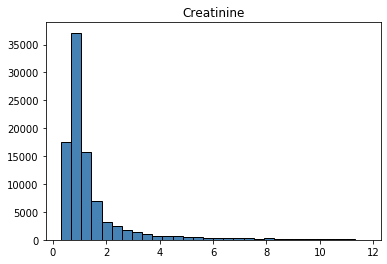

Creatinine
cnt: 93670 mean: 1.4479 std: 1.5050 max: 11.7000 min: 0.3000 median: 0.9400


In [6]:
stat_fn_2 = 'challenge_part_stat.csv'
stat_f2 = open(stat_fn_2, 'w', encoding='utf-8')
writer2 = csv.writer(stat_f2)
writer2.writerow(['feature_name', 'cnt', 'mean', 'std', 'max', 'min', 'median'])

for i in index:
    cur = np.array(all_x[i])
    cur = np.sort(cur)
    threshold = int(len(all_x[i]) * 0.005)
    cur = cur[threshold: -threshold]
    tmp_mean = np.mean(cur)
    tmp_std = np.std(cur)
    tmp_min = np.min(cur)
    tmp_max = np.max(cur)
    tmp_med  = np.median(cur)
    pdf = PdfPages('./data/stat figures/chal_' +feature_name[i] +'_part.pdf')
    plt.hist(cur, bins=30, color='steelblue', edgecolor='black')
    plt.title(feature_name[i])
    pdf.savefig()
    plt.show()
    pdf.close()
    print(feature_name[i])
    print('cnt: %d mean: %.4f std: %.4f max: %.4f min: %.4f median: %.4f' \
          % (np.size(cur), tmp_mean, tmp_std, tmp_max, tmp_min, tmp_med))
    writer2.writerow([feature_name[i], str(np.size(cur)), str(tmp_mean), \
                      str(tmp_std), str(tmp_max), str(tmp_min), str(tmp_med)])
    
for i in range(40):
    if i not in index:
        cur = np.array(all_x[i])
        cur = np.sort(cur)
        threshold = int(len(all_x[i]) * 0.005)
        cur = cur[threshold: -threshold]
        tmp_mean = np.mean(cur)
        tmp_std = np.std(cur)
        tmp_min = np.min(cur)
        tmp_max = np.max(cur)
        tmp_med  = np.median(cur)
        writer2.writerow([feature_name[i], str(np.size(cur)), str(tmp_mean), \
                          str(tmp_std), str(tmp_max), str(tmp_min), str(tmp_med)])
stat_f2.close()

In [4]:
cnt = 0
x = []
demo = []
y = []
mask_x = []
mask_demo = []
name = []
# Normalize and dump data
for fn in training_files:
    cnt += 1
    name.append(int(fn[1:].split('.')[0]))
    fn = data_path + fn
    cur_x = []
    cur_demo = []
    cur_y = []
    cur_mask_x = []
    cur_mask_demo = []
    with open(fn, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            mask_list = [1 for i in range(len(row)-1)]
            if row[0] == "HR":
                continue
            for i in range(len(row)-1):
                if row[i] == '':
                    row[i] = 0
                    mask_list[i] = 0
                else:
                    row[i] = (float(row[i]) - mean_x[i]) / std_x[i]
            cur_x.append(row[0:34])
            if len(cur_demo) > 0 and cur_demo[2] != row[36]:
                print("Unit 1 Diff!")
            if len(cur_demo) > 0 and cur_demo[3] != row[37]:
                print("Unit 2 Diff!")
            cur_demo = row[34:39]
            
            cur_y.append(0 if row[-1] == '' else int(row[-1]))
            cur_mask_x.append(mask_list[0:34])
            cur_mask_demo = mask_list[34:39]
    if cnt % 100 == 0:
        print('processing: %d of %d, %.4f %%...' % (cnt, training_size, 100*(cnt/training_size)))
    x.append(cur_x)
    demo.append(cur_demo)
    y.append(cur_y)
    mask_x.append(cur_mask_x)
    mask_demo.append(cur_mask_demo)

processing: 100 of 40336, 0.2479 %...
processing: 200 of 40336, 0.4958 %...
processing: 300 of 40336, 0.7438 %...
processing: 400 of 40336, 0.9917 %...
processing: 500 of 40336, 1.2396 %...
processing: 600 of 40336, 1.4875 %...
processing: 700 of 40336, 1.7354 %...
processing: 800 of 40336, 1.9833 %...
processing: 900 of 40336, 2.2313 %...
processing: 1000 of 40336, 2.4792 %...
processing: 1100 of 40336, 2.7271 %...
processing: 1200 of 40336, 2.9750 %...
processing: 1300 of 40336, 3.2229 %...
processing: 1400 of 40336, 3.4708 %...
processing: 1500 of 40336, 3.7188 %...
processing: 1600 of 40336, 3.9667 %...
processing: 1700 of 40336, 4.2146 %...
processing: 1800 of 40336, 4.4625 %...
processing: 1900 of 40336, 4.7104 %...
processing: 2000 of 40336, 4.9583 %...
processing: 2100 of 40336, 5.2063 %...
processing: 2200 of 40336, 5.4542 %...
processing: 2300 of 40336, 5.7021 %...
processing: 2400 of 40336, 5.9500 %...
processing: 2500 of 40336, 6.1979 %...
processing: 2600 of 40336, 6.4459 

processing: 20800 of 40336, 51.5668 %...
processing: 20900 of 40336, 51.8148 %...
processing: 21000 of 40336, 52.0627 %...
processing: 21100 of 40336, 52.3106 %...
processing: 21200 of 40336, 52.5585 %...
processing: 21300 of 40336, 52.8064 %...
processing: 21400 of 40336, 53.0543 %...
processing: 21500 of 40336, 53.3023 %...
processing: 21600 of 40336, 53.5502 %...
processing: 21700 of 40336, 53.7981 %...
processing: 21800 of 40336, 54.0460 %...
processing: 21900 of 40336, 54.2939 %...
processing: 22000 of 40336, 54.5418 %...
processing: 22100 of 40336, 54.7898 %...
processing: 22200 of 40336, 55.0377 %...
processing: 22300 of 40336, 55.2856 %...
processing: 22400 of 40336, 55.5335 %...
processing: 22500 of 40336, 55.7814 %...
processing: 22600 of 40336, 56.0294 %...
processing: 22700 of 40336, 56.2773 %...
processing: 22800 of 40336, 56.5252 %...
processing: 22900 of 40336, 56.7731 %...
processing: 23000 of 40336, 57.0210 %...
processing: 23100 of 40336, 57.2689 %...
processing: 2320

In [6]:
len(row)

41

In [9]:
index_array = list(range(len(x)))
# np.random.shuffle(index_array)
# print(index_array[:10])

In [10]:
out_x = []
out_y = []
out_demo = []
out_name = []
out_mask_x = []
out_mask_demo = []

for idx in index_array:
    out_x.append(x[idx])
    out_y.append(y[idx])
    out_name.append(name[idx])
    out_demo.append(demo[idx])
    out_mask_x.append(mask_x[idx])
    out_mask_demo.append(mask_demo[idx])


In [11]:
pickle.dump(out_x, open('./new1/new_x.dat', 'wb'))
pickle.dump(out_y, open('./new1/new_y.dat', 'wb'))
pickle.dump(out_demo, open('./new1/new_demo.dat', 'wb'))
pickle.dump(out_name, open('./new1/new_name.dat', 'wb'))
pickle.dump(stat, open('./new1/stat.dat','wb'))
pickle.dump(out_mask_x, open('./new1/new_mask_x.dat', 'wb'))
pickle.dump(out_mask_demo, open('./new1/new_mask_demo.dat', 'wb'))

In [12]:
cnt = 0
x = []
demo = []
y = []
# Normalize and dump data
for fn in training_files:
    cnt += 1
    fn = data_path + fn
    cur_x = []
    cur_demo = []
    cur_y = []
    front = [(med_x[i] - mean_x[i]) / std_x[i] for i in range(len(row) - 1)]
    #front = [med_x[i] for i in range(len(row) - 1)]
    with open(fn, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == "HR":
                continue
            for i in range(len(row)-1):
                if row[i] == '':
                    row[i] = front[i]
                else:
                    row[i] = (float(row[i]) - mean_x[i]) / std_x[i]
                    row[i] = float(row[i])
                    front[i] = row[i]
            cur_x.append(row[0:34])
            cur_demo.append(row[35:41])
            cur_y.append(0 if row[-1] == '' else int(row[-1]))
    if cnt % 100 == 0:
        print('processing: %d of %d, %.4f %%...' % (cnt, training_size, 100*(cnt/training_size)))
    x.append(cur_x)
    demo.append(cur_demo)
    y.append(cur_y)

processing: 100 of 40336, 0.2479 %...
processing: 200 of 40336, 0.4958 %...
processing: 300 of 40336, 0.7438 %...
processing: 400 of 40336, 0.9917 %...
processing: 500 of 40336, 1.2396 %...
processing: 600 of 40336, 1.4875 %...
processing: 700 of 40336, 1.7354 %...
processing: 800 of 40336, 1.9833 %...
processing: 900 of 40336, 2.2313 %...
processing: 1000 of 40336, 2.4792 %...
processing: 1100 of 40336, 2.7271 %...
processing: 1200 of 40336, 2.9750 %...
processing: 1300 of 40336, 3.2229 %...
processing: 1400 of 40336, 3.4708 %...
processing: 1500 of 40336, 3.7188 %...
processing: 1600 of 40336, 3.9667 %...
processing: 1700 of 40336, 4.2146 %...
processing: 1800 of 40336, 4.4625 %...
processing: 1900 of 40336, 4.7104 %...
processing: 2000 of 40336, 4.9583 %...
processing: 2100 of 40336, 5.2063 %...
processing: 2200 of 40336, 5.4542 %...
processing: 2300 of 40336, 5.7021 %...
processing: 2400 of 40336, 5.9500 %...
processing: 2500 of 40336, 6.1979 %...
processing: 2600 of 40336, 6.4459 

processing: 20500 of 40336, 50.8231 %...
processing: 20600 of 40336, 51.0710 %...
processing: 20700 of 40336, 51.3189 %...
processing: 20800 of 40336, 51.5668 %...
processing: 20900 of 40336, 51.8148 %...
processing: 21000 of 40336, 52.0627 %...
processing: 21100 of 40336, 52.3106 %...
processing: 21200 of 40336, 52.5585 %...
processing: 21300 of 40336, 52.8064 %...
processing: 21400 of 40336, 53.0543 %...
processing: 21500 of 40336, 53.3023 %...
processing: 21600 of 40336, 53.5502 %...
processing: 21700 of 40336, 53.7981 %...
processing: 21800 of 40336, 54.0460 %...
processing: 21900 of 40336, 54.2939 %...
processing: 22000 of 40336, 54.5418 %...
processing: 22100 of 40336, 54.7898 %...
processing: 22200 of 40336, 55.0377 %...
processing: 22300 of 40336, 55.2856 %...
processing: 22400 of 40336, 55.5335 %...
processing: 22500 of 40336, 55.7814 %...
processing: 22600 of 40336, 56.0294 %...
processing: 22700 of 40336, 56.2773 %...
processing: 22800 of 40336, 56.5252 %...
processing: 2290

In [14]:
out_x = []
out_y = []
out_demo = []

for idx in index_array:
    out_x.append(x[idx])
    out_y.append(y[idx])
    out_demo.append(demo[idx])

In [15]:
pickle.dump(out_x, open('./data/Challenge/normalized/new_x_front_fill.dat', 'wb'))
pickle.dump(out_y, open('./data/Challenge/normalized/new_y_front_fill.dat', 'wb'))
pickle.dump(out_demo, open('./data/Challenge/normalized/new_demo_front_fill.dat', 'wb'))

In [18]:
print(out_x[0])
print(out_y[0])
print(out_demo[0])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.13959732669071465, -0.747024887714533, -1.2691053032588202, 0, 0, 0, 0.24979487340799464, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1.2939827622745723, 0.6149447909519286, 0, 1.8616726109879516, 1.7501130723080178, 0.9436400757845987, -0.5347970473908028, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.9240557915130858, 0, 0, 0, 0, 0, 0, 0, 0], [0.6013515009242577, -0.747024887714533, 0, 2.808660776689615, 2.484428814128125, 1.58852383351643, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.024158783132328877, -0.0660400483813022, 0, 1.5173132780055285, 1.1381832874579283, 0.4420638197709522, 0.05364689320829528, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0927115001280634, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.024158783132328877, 0.2744523712853132, 0.6789124426658851, 1.9477624442335573, 

In [2]:
out_x = pickle.load(open('./data/Challenge/normalized/raw_x_front_fill.dat', 'rb'))
out_y = pickle.load(out_y, open('./data/Challenge/normalized/raw_y_front_fill.dat', 'rb'))
out_demo = pickle.load(out_demo, open('./data/Challenge/normalized/raw_demo_front_fill.dat', 'rb'))

NameError: name 'out_x' is not defined